In [2]:
import matplotlib.pyplot as plt
import pandas as pd
LANDING_DATA_DIR = "../../data/landing"
RAW_DATA_DIR = "../../data/raw"
CURATED_DATA_DIR = "../../data/curated"

In [3]:
path = f'{LANDING_DATA_DIR}/crime_data.xlsx'
crime_df = pd.read_excel(path, sheet_name='Table 02')
crime_df

,Year,Year ending,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2023,March,Ballarat,Ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2,1.590275,1.693561
1,2023,March,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,171,135.968526,144.799464
2,2023,March,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,144,114.499811,121.936391
3,2023,March,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",34,27.034678,28.790537
4,2023,March,Ballarat,Ballarat,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,287,228.204484,243.026001
...,...,...,...,...,...,...,...,...,...,...
53010,2014,March,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,7,4.606233,4.606233
53011,2014,March,Yarra Ranges,Yarra Ranges,F Other offences,F30 Other government regulatory offences,F34 Pornography and censorship offences,2,1.316067,1.316067
53012,2014,March,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F91 Environmental offences,2,1.316067,1.316067
53013,2014,March,Yarra Ranges,Yarra Ranges,F Other offences,F90 Miscellaneous offences,F93 Cruelty to animals,6,3.948200,3.948200


In [3]:
# Make sure the 'Year' and 'Month' columns are in datetime format
crime_df['Year'] = pd.to_datetime(crime_df['Year'], format='%Y')

# Filter the data between 2017 and 2023
filtered_df = crime_df[(crime_df['Year'] >= '2017-01-01') & (crime_df['Year'] <= '2023-12-31')]

#Aggregate by Year and LGA

# Group by 'LGA Name', 'Year', and 'Month', and aggregate 'Crime Count' using sum
aggregated_df = crime_df.groupby(['Local Government Area', 'Year'])['Offence Count'].sum().reset_index()
aggregated_df


,Local Government Area,Year,Offence Count
0,Alpine,2014-01-01,465
1,Alpine,2015-01-01,527
2,Alpine,2016-01-01,438
3,Alpine,2017-01-01,396
4,Alpine,2018-01-01,484
...,...,...,...
785,Yarriambiack,2019-01-01,422
786,Yarriambiack,2020-01-01,513
787,Yarriambiack,2021-01-01,457
788,Yarriambiack,2022-01-01,418


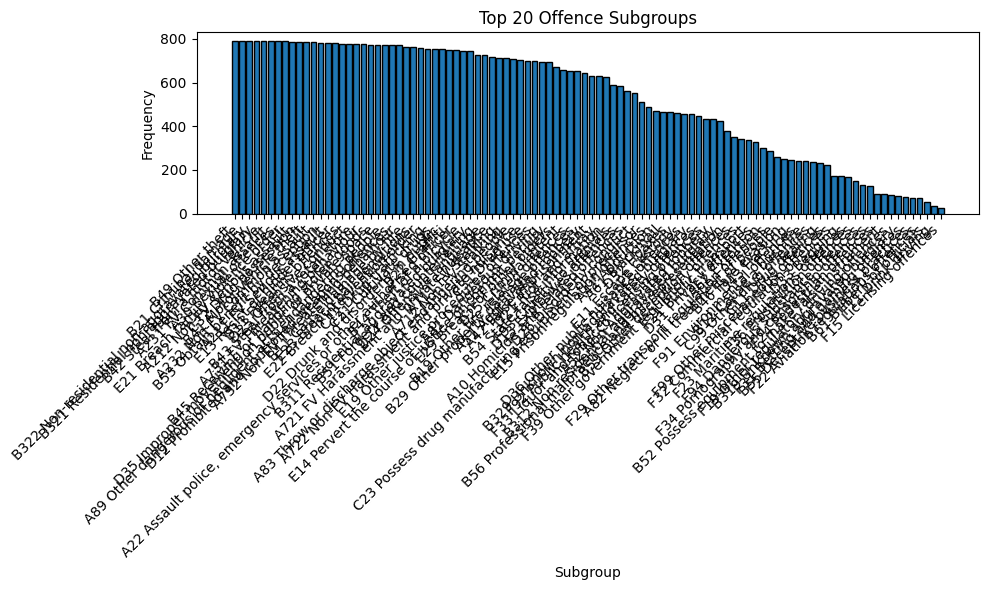

In [9]:
#Get list of distinct offence subgroups 

distinct_subgroups = crime_df['Offence Subgroup'].unique()
#print(distinct_subgroups)

# Count the frequency of each category
category_counts = crime_df['Offence Subgroup'].value_counts()

# Select the top 20 categories
top_categories = category_counts.head(100)

# Create a histogram with slanted x-axis text
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_categories.index, top_categories.values, edgecolor='black')
plt.xlabel('Subgroup')
plt.ylabel('Frequency')
plt.title('Top 20 Offence Subgroups')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()